
This API use guide produces results reported in **Chapter 5**.
 
In addition to the codes for verifying the place cell, head-directional cell and analyses of rhythmic units,
it also shows examples of other useful methods that can be harnessed for creating simple and efficient analysis scripts and data management.

Please refer to the code-documentation for the description of each module, their classes and functions, and methods in each class.

In addition to the example units, this guide shows uses of NeuroChaT and its components in many different ways.

# Step-1: Download NeuroChaT package from [OSF](https://osf.io/kqz8b) or [GitHub](https://github.com/mnislamraju/NeuroChaT)
NeuroChaT can be used without any burden of installation. You can download a local copy of NeuroChaT codes and insert the path to your system.

# Step-2 Insert NeuroChaT path to $PYTHONPATH

In [1]:
import sys
sys.path.insert(1, 'C:\\Users\\Raju\\Google Drive\\NeuroChaT Py\\neurochat')

 # Step-3 Import modules and classes
 We are importing only NSpike and NSpatial for the moment. 
 We will add and import NLfp data for analyses that require LFP signals.
 nc_plot is the module that provides with plotting functions


In [2]:
from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot


 # Step-4 Instantiate objects
 The names C0 and S0 for for the unit and the spatial data are arbitrary

In [3]:
spike= NSpike(system = 'Axona')
spike.set_name('C0')

spat= NSpatial(system = 'Axona')
spat.set_name('S0')

In [ ]:
# Step-5 Add names for the data files

In [4]:
data_dir= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Place Cell\\Place cell 6 tetrode 6 cluster 3\\'

spat.set_filename(data_dir + '040513_1_1.txt')
spike.set_filename(data_dir + '040513_1.6')

## For HDF5 files, 
Path of the data should also be added following a '+' sign. The system argument should be changed or could be set at NSpatial(system= 'Axona')


In [ ]:
spat.set_system('NWB')
spike.set_system('NWB')

data_dir= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Place Cell\\Place cell 6 tetrode 6 cluster 3\\'
spat.set_filename(data_dir + '040513_1.hdf5+/processing/Behavioural/Position')
spike.set_filename(data_dir + '040513_1.hdf5+/processing/Shank/6')

# Step-6 Load spatial and spike data. Set the unit number

In [5]:
spat.load()
spike.load()

spike.set_unit_no(3)

# Step-7 Instantiate NData object. Add individual data objects to NData object.


In [6]:
ndata= NData()
ndata.spike= spike
ndata.spatial= spat


The data format, filenames for individual datasets can be set using ndata


In [ ]:
ndata.set_data_format(data_format = 'NWB')

ndata.set_spatial_file(data_dir + '040513_1.hdf5+/processing/Behavioural/Position')
ndata.set_spike_file(data_dir + '040513_1.hdf5+/processing/Shank/6')

They can be loaded using ndata

In [ ]:
ndata.load()

Or, individually

In [ ]:
ndata.load_spatial()
ndata.load_spike()

And the unit number can be set as well

In [ ]:
ndata.set_unit_no(3)

# Step-8 Perfrom analysis of interest

## Analysis of place cell
### Place cell firing map by using ndata:
Pixel size is set 3cm. A 5x5 box filter is used for smoothing the firing map

In [7]:
placeData= ndata.place(pixel = 3, filter = ['b', 5])

### Similar results can be obtained by passing timestamps of the spiking unit to the spat.place() method
NData object performs the job of connecting these two objects and simplifies the analysis

In [ ]:
placeData= spat.place(spike.get_unit_stamp(), pixel = 3, filter = ['b', 5])

### Plotting relevant data 
Refer to nc_plot.py module for more plotting functions.

*Following command is used for inline display of graphics in Notebook*

In [8]:
%matplotlib inline

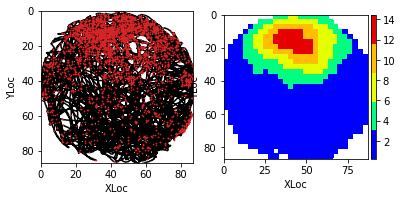

In [9]:
fig= nc_plot.loc_firing(placeData)

### Analysis and plotting of locational shuffling analysis using default parameters
The spike timestamps are shuffled for 500 times. Pixel size is 3 cm. 
limit=0 implies that the spikes timestamps are randomly shuffled in (-duration, +duration) range

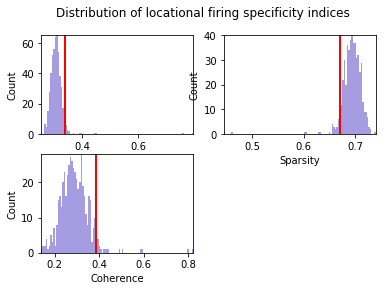

In [10]:
pshuffleData= ndata.loc_shuffle(nshuff = 500, limit = 0, pixel = 3)
fig= nc_plot.loc_shuffle(pshuffleData)


### Analysis and plotting of locational shifting analysis using shifting index from -10 to +20
Spike timestamps are gradually shifted from -10 to +20 units of spatial time-resolution.
If the video for tracking animal behviour is sampled at 50Hz, this means the spike-train is shifted from -200ms to +400ms

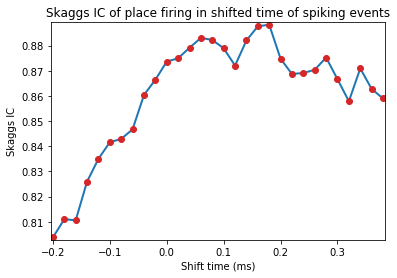

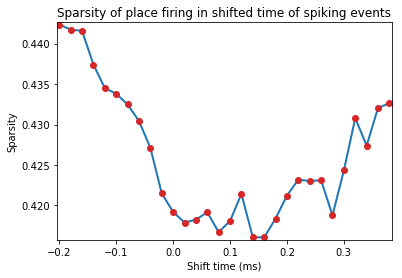

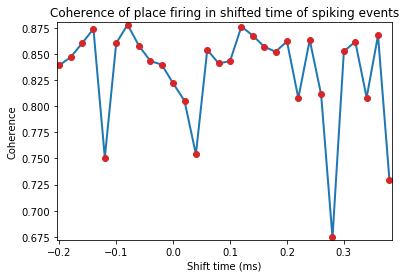

In [11]:
import numpy as np # numpy imported for the use of np.range
pshiftData= ndata.loc_shift(shift_ind = np.arange(-10, 20))
fig= nc_plot.loc_time_shift(pshiftData)

### Head directional analysis of this unit

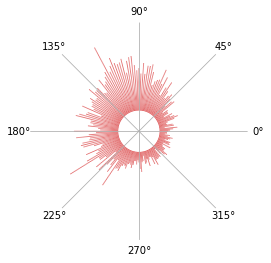

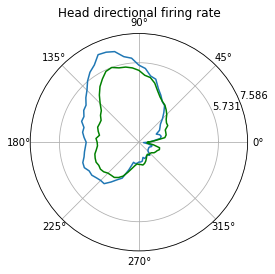

In [12]:
hdData= ndata.hd_rate()
fig= nc_plot.hd_firing(hdData)

### Multiple regression analysis and plotting

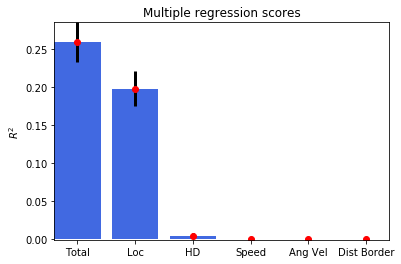

In [13]:
regressData= ndata.multiple_regression()
fig= nc_plot.multiple_regression(regressData)

### If the data files are in Axona or Neuralynx format, they can be exported to HDF5 file

In [ ]:
ndata.save_to_hdf5()

### Datasets can be saved individually as well


In [14]:
spike.save_to_hdf5()
spat.save_to_hdf5()

### Parametric results of all the analysis performed can be obtained by

In [15]:
results= ndata.get_results() # Returns the results in OrderedDict
print(results)

OrderedDict([('Spatial Skaggs', 0.87363237668517801), ('Spatial Sparsity', 0.41920352222017176), ('Spatial Coherence', 0.82191292689890405), ('Loc Skaggs 95', 0.33743438803043752), ('Loc Sparsity 05', 0.71946056545786297), ('Loc Coherence 95', 0.38296777900374684), ('Loc Opt Shift Skaggs', array([ 0.18])), ('Loc Opt Shift Sparsity', array([ 0.16])), ('Loc Opt Shift Coherence', array([-0.08])), ('HD Skaggs', 0.17060729747597284), ('HD Rayl Z', 24.493680532080919), ('HD Rayl P', 1.2819522146275648e-11), ('HD von Mises K', 0.6639255940574873), ('HD Mean', 137.54600963832547), ('HD Mean Rate', 77.748719154002572), ('HD Res Vect', 0.31503645074286685), ('HD Peak Rate', 7.5858250276854937), ('HD Peak', 115), ('HD Half Width', 176), ('Mult Rsq', 0.2587727606182223), ('Semi Rsq Loc', 0.19786047209173907), ('Semi Rsq HD', 0.0049837182830173334), ('Semi Rsq Speed', 0.00078688801150850391), ('Semi Rsq Ang Vel', 0.0005234149863417505), ('Semi Rsq Dist Border', 0.00048427333149445273)])


### Results from individual data objects can also be retrieved similarly

In [ ]:
spike_results = spike.get_results()
spat_results = spat.get_results()


 ## Analysis of head-directional cell
 Change data filename/paths for the new unit similar to what was done for the place cell information
 Load new data and set the unit number. No need to reassign to ndata, as Python assignments are by reference, not by value.


In [16]:

ndata.set_data_format('NWB')

data_dir= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\HD Cell\\HD cell tetrode 3 Cluster 1\\'
spat.set_filename(data_dir + '120412_1.hdf5+/processing/Behavioural/Position')
spike.set_filename(data_dir + '120412_1.hdf5+/processing/Shank/3')


spat.load()
spike.load()

spike.set_unit_no(1)

Reset results to omit parametric output of previously analysed unit. This can be done before loading the new datasets or at any stage of the analysis.

In [17]:
ndata.reset_results()

 Or, results can be reset using individual data objects

In [ ]:
spat.reset_results()
spike.reset_results()


### Head-directional firing rate analysis and plot


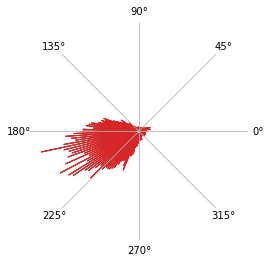

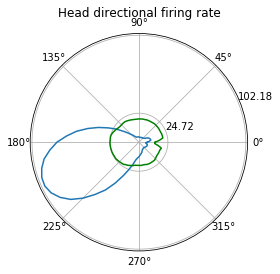

In [18]:
hdData= ndata.hd_rate()
fig= nc_plot.hd_firing(hdData)

### Head directional shuffling analysis and plot
Number of bins for the histogram of the shuffled data is set to 100

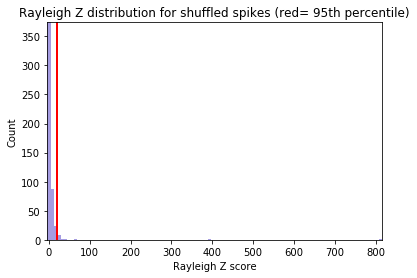

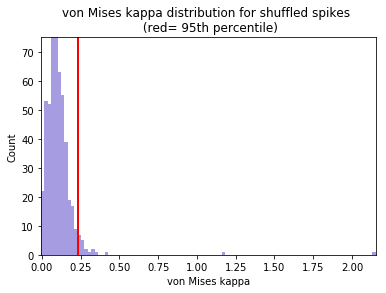

In [19]:
hshuffleData= ndata.hd_shuffle(nshuff = 500, limit=0, bins= 100)
fig= nc_plot.hd_shuffle(hshuffleData)


### Head directional time-shift analysis

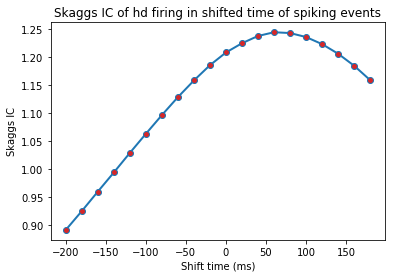

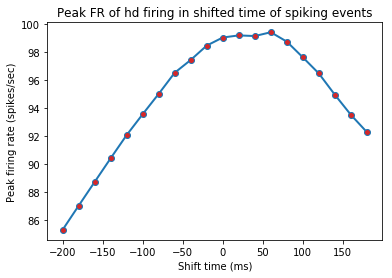

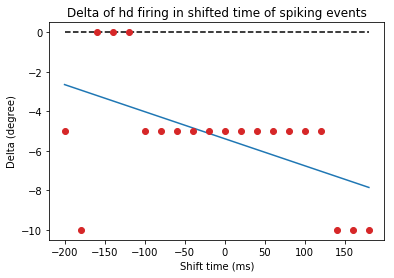

In [20]:
hshiftData= ndata.hd_shift(shift_ind=np.arange(-10, 10))
fig= nc_plot.hd_time_shift(hshiftData)

### Head directional multiple regression

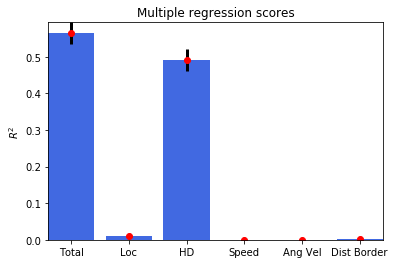

In [21]:
regressData= ndata.multiple_regression()
fig= nc_plot.multiple_regression(regressData)

## Analysis of spike-train dynamics
### Changing the data filename/paths for the new unit


In [22]:
data_dir= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Theta cell tetrode 5 Cluster 1\\'
spat.set_filename(data_dir + '112512_1.hdf5+/processing/Behavioural/Position')
spike.set_filename(data_dir + '112512_1.hdf5+/processing/Shank/5')

spat.load()
spike.load()

spike.set_unit_no(1)

Reset results to omit parametric output of previously analysed unit

In [23]:
ndata.reset_results()


### Waveform properties of the unit

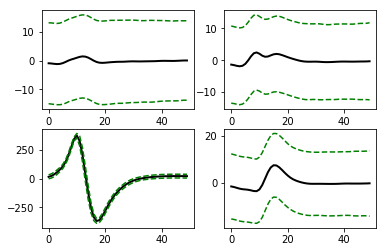

In [24]:
graphData= ndata.wave_property()
fig= nc_plot.wave_property(graphData, [int (spike.get_total_channels()/2), 2])

### Inter-spike interval (ISI) histogram.
The number of bins for histogram is 350, and the maximum ISI to bin for is 350ms.
This implies each bin represents 1msec interval.
'graphData' term will be used repetedly from now on for reusing the memory

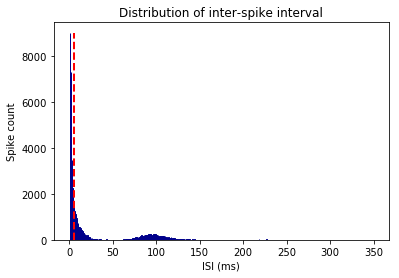

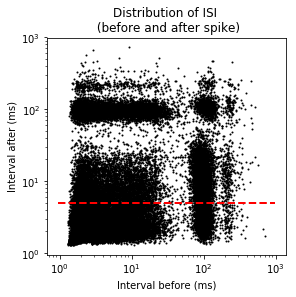

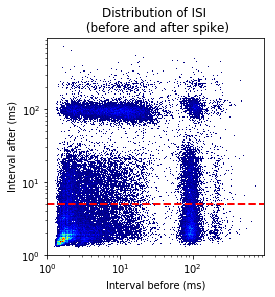

In [25]:
graphData= ndata.isi(bins = 350, bound = [0, 350])
fig= nc_plot.isi(graphData)

### ISI autocorrelation histogram for longer length
Binsize is 1msec, and autocrrelation is performed from -350ms to +350ms


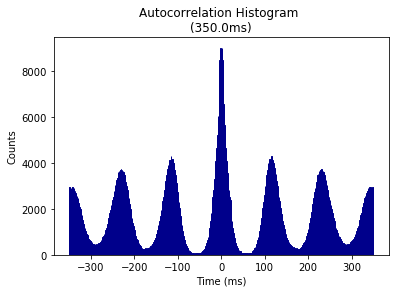

In [26]:
graphData= ndata.isi_corr(bins = 1, bound = [-350, 350])
fig= nc_plot.isi_corr(graphData)

### ISI autocorrelation histogram for shorter length
Binsize is 1msec, and autocrrelation is performed from -10ms to +10ms


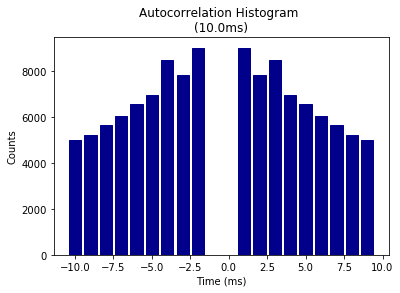

In [27]:
graphData= ndata.isi_corr(bins = 1, bound = [-10, 10])
fig= nc_plot.isi_corr(graphData)

### Theta modulation Index analysis
Input paramteres are for [Frequency, tau1, tau2] and provides the starting value, 
lower, and upper bound for the fitted sinusoidal equation. Binsize and remporal bound
are that of ISI autocorrelation histogram


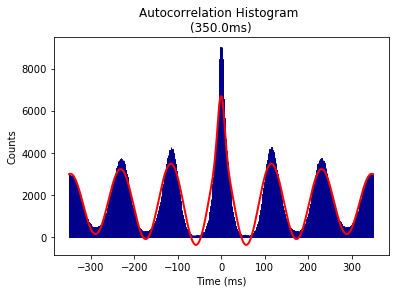

In [28]:
graphData= ndata.theta_index( start = [6, 0.1, 0.05], \
                             lower = [4, 0, 0], \
                             upper = [14, 5, 0.1], \
                             bins = 1, bound = [-350, 350])
fig= nc_plot.theta_cell(graphData)

Above analyses can also be done using the spike data itself as it does not require information from other data object. For example,

In [ ]:
graphData= spike.isi(bins = 350, bound = [0, 350])
fig= nc_plot.isi(graphData)

## Analysis of rhythmicity of LFP and spike-to-LFP phase relationships

### Import NLfp class

In [30]:
from neurochat.nc_lfp import NLfp

### Instatiate LFP data object, set the filename, load data, and add to ndata

In [31]:
lfp= NLfp(system= 'NWB')

lfp.set_filename(data_dir+ '\\112512_1.hdf5+/processing/Neural Continuous/LFP/eeg')

lfp.load()

ndata.lfp= lfp

### LFP frequency spectrum analysis

Hanning window of 2sec with 1sec overlap and number of FFT components= 2048. 
ptype is 'psd' which means power-spectral density. Other option can be 'power'.
prefilt set 'True' for pre-filtering the LFP signal with a bandpass filter as set by filtset.
filtset= [filter order, lower cutoff frequency, higher cutoff frequency, type of filtering].
fmax defines the maximum frequency to analyse.
db set to 'True' will convert the spectogram in decibel unit.
tr set to 'True' creates a time-resolved spectogram with 'window'-resolution and 'overlap' amount of signal overlap.
tr set to 'False' calculates the spectogram using Welch's method.
This function can also be similarly called as ndata.spectrum()

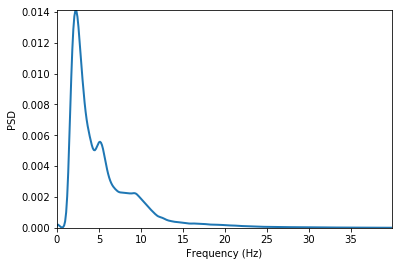

In [32]:
graphData= lfp.spectrum(window = 2, noverlap = 1, nfft = 2048, ptype = 'psd', \
            prefilt = True, filtset = [10, 1.5, 40, 'bandpass'], \
            fmax = 40, db = False, tr = False)
fig= nc_plot.lfp_spectrum(graphData)

After setting tr as True and db = True

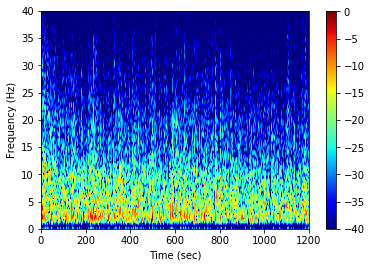

In [33]:
graphData= lfp.spectrum(window = 2, noverlap = 1, nfft = 2048, ptype = 'psd', \
            prefilt = True, filtset = [10, 1.5, 40, 'bandpass'], \
            fmax = 40, db = True, tr = True)
fig= nc_plot.lfp_spectrum_tr(graphData)

### Spike-LFP phase distribution
fwin= [6,12] means that the phase of the spike are sought in the LFP band of
6Hz to 12 Hz. The minimum power of this band to be accepted to carry significant theta
is 0.2 times the total LFP power, and that of the amplitude of the band signal is
0.15 times the amplitude of the LFP signal. The LFP signal is prefiltered using
the filtset parameters.


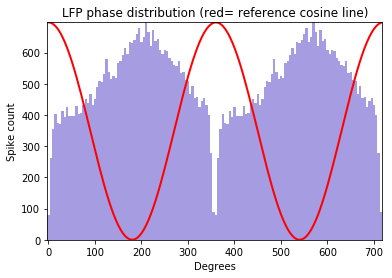

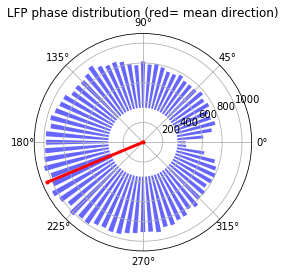

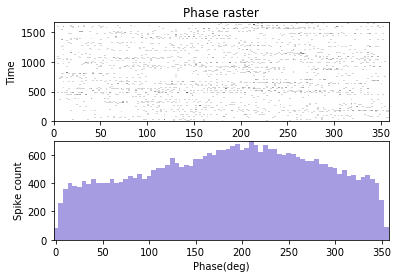

In [34]:
graphData= ndata.phase_dist(binsize = 5, rbinsize = 2, fwin = [6, 12],\
        pratio = 0.1, aratio = 0.15, filtset = [10, 1.5, 40, 'bandpass'])
fig= nc_plot.spike_phase(graphData)

### The analysis can be performed from both the NLfp() and NSpike() objects

Using the lfp object:

In [ ]:
graphData= lfp.phase_dist(spike.get_unit_stamp(), binsize = 5, rbinsize = 2, fwin = [6, 12],\
        pratio = 0.1, aratio = 0.15, filtset = [10, 1.5, 40, 'bandpass'])
fig= nc_plot.spike_phase(graphData)


Using the spike object:

In [ ]:
graphData= spike.phase_dist(lfp = lfp , binsize = 5, rbinsize = 2, fwin = [6, 12],\
        pratio = 0.1, aratio = 0.15, filtset = [10, 1.5, 40, 'bandpass'])
fig= nc_plot.spike_phase(graphData)

### Analysis of phase-locking value (PLV), spike-field coherence (SFC), and spike-triggerd average (STA)
Window of the LFP chunks in reference to the spike timestamps is set to -400ms to +400ms
Frequency of interest for the analysis is set as 2Hz to 30Hz

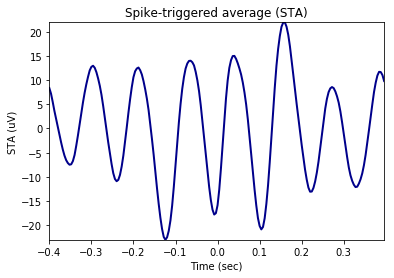

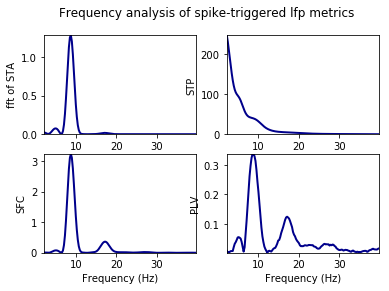

In [35]:
graphData= ndata.plv(window = [-0.4, 0.4], fwin = [2, 40])
fig= nc_plot.plv(graphData)

 *Time-resolved* as set by mode= 'tr'.
 nsample implies number of randomly selected spikes around which the LFP signals are cut for phase-locking analysis
 slide gives the time in ms by which the window is shifted from left to right to obtain the time-resolved phase-locking analysis

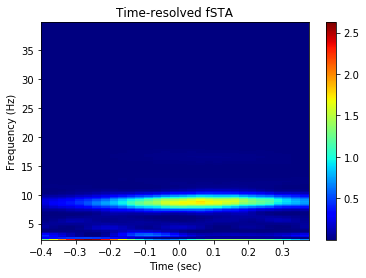

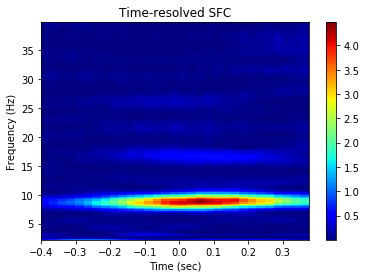

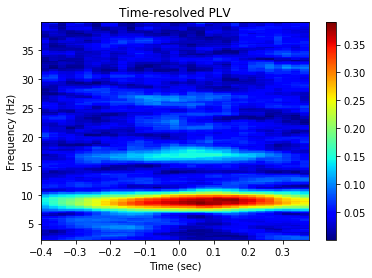

In [36]:
graphData= ndata.plv(window = [-0.4, 0.4], nfft = 1024, mode = 'tr', nsample = 2000, slide = 25, fwin = [2, 40])
fig= nc_plot.plv_tr(graphData)

 In most of the cases where composite information are required and ndata is
 not used, the spike timestamp is provided as the first argument to the methods
 followed by other information. Because, in such cases only information required
 by the analysis from the spike object is the timestamps of individual spikes 
 in the train. For example,

In [ ]:
graphData= ndata.plv(window = [-0.4, 0.4], fwin = [2, 40])
fig= nc_plot.plv(graphData)


gives the same result as the codes given below:

In [ ]:
graphData= lfp.plv(spike.get_unit_stamp(), window = [-0.4, 0.4], fwin = [2, 30])
fig= nc_plot.plv(graphData)

## Use of Nhdf class

### Import and instantiate Nhdf class


In [37]:
from neurochat.nc_hdf import Nhdf
hdf= Nhdf()

### Store data using Nhdf object
Nhdf() resolves the filename and the path for storage of the data using 
Nhdf().resolve_pathname(data=data_obj) where data_obj can be a NSpatial(), NSpike()
of NLfp() object

In [38]:
hdf.save_spatial(spat)
hdf.save_spike(spike)
hdf.save_lfp(lfp)

### This can also be done using

In [ ]:
hdf.save_object(obj = spat)
hdf.save_object(obj = spike)
hdf.save_object(obj = lfp)

### Graphical data from indiviudal analysis can be stored using the following codes.
*path* is the path inside HDF5 file. Analysis data are always recommended to store in the */analysis/* path.
But analysis for each unit+lfp pair is stored in one path under which graphical data from individual analyses are store.
The unique unit ID is established using the name resolving method Nhdf().resolve_analysis_path() which utilizes the
filename of the recorded data, electrode/tetrode number, eeg channel ID and the unit number.
*name* is the name of the analysis following the unit ID, i.e. 'plv' etc.
*graph_data* are the dictionary data that are plotted using the functions iin nc_plot

In [39]:
unit_id= hdf.resolve_analysis_path(spike = spike, lfp = lfp)

hdf_name= hdf.resolve_hdfname(data=spike) # Resolve HDF5 filename
hdf.set_filename(hdf_name) # NeuoChaT opens the file as file-object as soon as new filename is set.

print(unit_id)

hdf.save_dict_recursive(path ='/analysis/' + unit_id+ '/' ,
             name = 'plv', data = graphData)

TT5_SS_1_eeg


### Analysis results can be stored by

In [40]:
results= ndata.get_results()
hdf.save_dict_recursive(path ='/analysis/' + unit_id+ '/' ,
             name = 'results', data = results)

### Apart from that data and attributes to any group or dataset can be added using
Set *create_group* to 'True' it will create the path if does not already exist

In [ ]:
hdf.save_dataset(path = '/path/to/group/', name = 'name_of_dataset', data = date_to_store, create_group = True)
hdf.save_attributes(path= '/path/to/group/or/dataset/', attr = dict_of_attributes)

# Use of NeuroChaT class

## Import NeuroChaT class and instantiate

In [41]:
from neurochat.nc_control import NeuroChaT
nc= NeuroChaT()

## Convert files in Axona format to NWB files specified in an Excel list

In [44]:
excel_file= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Conversion list in this folder_labpc.xlsx'
nc.convert_to_nwb(excel_file)

:02:18:25 (nc_control.py)  --  Converting file groups: 1
:02:18:37 (nc_control.py)  --  Converting file groups: 2
:02:18:44 (nc_control.py)  --  Converting file groups: 3
:02:18:47 (nc_control.py)  --  Converting file groups: 4
:02:18:57 (nc_control.py)  --  Converting file groups: 5
:02:19:05 (nc_control.py)  --  Conversion process completed!


## Verify units provided in an Excel list before batch-mode analysis

In [46]:
excel_file= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Verify unit list in this folder_labpc.xlsx'
nc.verify_units(excel_file)

:02:20:07 (nc_control.py)  --  Verifying unit: 1
:02:20:07 (nc_control.py)  --  Verifying unit: 2
:02:20:08 (nc_control.py)  --  Verifying unit: 3
:02:20:08 (nc_control.py)  --  Verifying unit: 4
:02:20:10 (nc_control.py)  --  Verifying unit: 5
:02:20:11 (nc_control.py)  --  Verification process completed!


## Evaluate the quality of clustering from a list provided in an Excel file

In [48]:

excel_file= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Cluster quality evaluation unit list in this folder_labpc.xlsx'
nc.cluster_evaluate(excel_file)

:02:21:35 (nc_control.py)  --  Evaluating unit: 1
:02:21:38 (nc_control.py)  --  Evaluating unit: 2
:02:21:39 (nc_control.py)  --  Evaluating unit: 3
:02:21:51 (nc_control.py)  --  Cluster evaluation completed!


## Evaluate similarity of clusters
The excel list contains paired list of units to be compared for similarity


In [49]:
excel_file= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Comparison results_from NeuroChaT_pawels_data.xlsx'
nc.cluster_evaluate(excel_file)

:02:22:47 (nc_control.py)  --  Evaluating unit: 1
:02:22:47 (nc_control.py)  --  Evaluating unit: 2
:02:22:47 (nc_control.py)  --  Evaluating unit: 3
:02:22:48 (nc_control.py)  --  Evaluating unit: 4
:02:22:48 (nc_control.py)  --  Evaluating unit: 5
:02:22:48 (nc_control.py)  --  Cluster evaluation completed!


## Analysis using NeuroChaT
Analysis using NeuroChaT class is always done with the help of Configuration class
where the user specifies  all the data, intended analyses, input parameters etc.

### Configuration class
Import, instantiate, set the filename and load configuration from the file. 
This class uses nc_defaults.py module for importing deafult analyses and parameters.

In [54]:
from neurochat.nc_config import Configuration

config= Configuration()

config.set_config_file('C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\grid_config.ncfg')

config.load_config()

Set configuration to NeuroChaT object

In [55]:
nc.set_configuration(config)

Start analysis. This will 'read' the instructions from the config object and execute accordingly

In [56]:
nc.start()

:02:24:45 (nc_control.py)  --  Starting a new unit...
:02:24:49 (nc_control.py)  --  Calculating environmental border...
:02:24:49 (nc_control.py)  --  Assessing waveform properties...
:02:24:52 (nc_control.py)  --  Calculating inter-spike interval distribution...
:02:24:55 (nc_control.py)  --  Calculating inter-spike interval autocorrelation histogram...
:02:25:03 (nc_control.py)  --  Estimating theta-modulation index...
:02:25:26 (nc_control.py)  --  Estimating theta-skipping index...
:02:25:32 (nc_control.py)  --  Analyzing bursting property...
:02:25:32 (nc_control.py)  --  Calculating spike-rate vs running speed...
:02:25:33 (nc_control.py)  --  Calculating spike-rate vs angular head velocity...
:02:25:33 (nc_control.py)  --  Assessing head-directional tuning...
:02:25:34 (nc_control.py)  --  Shuffling analysis of head-directional tuning...
:02:25:50 (nc_control.py)  --  Time-lapsed head-directional tuning...
:02:25:52 (nc_control.py)  --  Time-shift analysis of head-directional t

C:\Users\Raju\Google Drive\NeuroChaT Py\neurochat\neurochat\nc_utils.py:289: RuntimeWarning: invalid value encountered in double_scalars
  np.sqrt(np.sum((x1- x1.mean())**2)*np.sum((x2- x2.mean())**2))


:02:26:09 (nc_control.py)  --  Assessing gridness...
:02:26:10 (nc_control.py)  --  Multiple-regression analysis...
:02:26:24 (nc_control.py)  --  Assessing dependence of variables to...
:02:26:26 (nc_control.py)  --  Output graphics saved to C:\Users\Raju\Google Drive\Sample Data for NC\Grid Cell\Grid cell tetrode 6 cluster 4\120213_26_TT6_SS_4_eeg.pdf
ERROR:02:26:26 (nc_hdf.py)  ERROR--  Error in creating HD ATI dataset to hdf5 file
:02:26:28 (nc_control.py)  --  Units already analyzed = 1
:02:26:28 (nc_control.py)  --  Total cell analyzed: 1


 Use *get_* and *set_* functions also known as getters and setters for accessing and setting values
 of interest. For example,
  * Getting and setting parameters:

In [58]:
param_list= config.get_param_list() # List of all parameters as dictionary keys

params_by_analysis= config.get_params_by_analysis(analysis= 'isi')
print(params_by_analysis)

param_val= config.get_params(name = 'isi_length') # name is the list of parameters or the name of a single parameter'
print(param_val)

config.set_param(name = 'isi_bin', value = 2)

{'isi_bin': 2, 'isi_length': 200}
200


* Getting and setting analyses:

In [61]:
list_of_analyses= config.get_analysis_list() # List of all analysis
print(list_of_analyses)

analysis_checked= config.get_analysis(name = 'isi') # If 'True', analysis is set to be done
print(analysis_checked)

config.set_analysis(name = 'theta_skip_cell', value = False) # Analysis of theta skippin cell turned off

['wave_property', 'isi', 'isi_corr', 'theta_cell', 'theta_skip_cell', 'burst', 'speed', 'ang_vel', 'hd_rate', 'hd_shuffle', 'hd_time_lapse', 'hd_time_shift', 'loc_rate', 'loc_shuffle', 'loc_time_lapse', 'loc_time_shift', 'spatial_corr', 'grid', 'border', 'gradient', 'multiple_regression', 'inter_depend', 'lfp_spectrum', 'spike_phase', 'phase_lock', 'lfp_spike_causality']
True


 Analyses can be performed in different modes, namely: 1. 'Single Unit'- one cell at time, value '0'
 2. 'Single Session'- all the cells in one recording at a time, value '1' 
 3. 'Listed Units'- all the cells listed in one Excel file, value '2'

* Getting and setting analysis mode:

In [63]:
print(config.get_analysis_mode())

config.set_analysis_mode(analysis_mode = 'Single Unit') # Can also set analysis_mode = 0

('Single Unit', 0)


What type of data file need to be specified depends on the type of mode and the format of the data
Please refer to the Configuration class for more such methods. Here, we show an example of settingh Axona data
and an example of batch mode analysis

### Specifying Axona files for analyses:

In [64]:
data_dir= 'C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\Place Cell\\Place cell 6 tetrode 6 cluster 3\\'

config.set_analysis_mode(0) # For 'Single Unit' analysis

config.set_spatial_file(spatial_file = data_dir+ '040513_1_1.txt')
config.set_spike_file(spike_file = data_dir + '040513_1.6')

config.set_unit_no(3)

We are interested in only certain anlyses. So, we first turn off all the analyses:

In [ ]:
config.set_analysis(name = 'all', value = False) # 'all' for setting all the analyses

Specify new analyses:

In [65]:
config.set_analysis(name = ['loc_rate', 'loc_shuffle', 'loc_time_lapse'], value = True) # See nc_defaults for names of the analyses

 Let us use default parameters for ease of understanding. NeuroChaT() always saves the graphics in a file. 
 Let us set the file in 'PDF' or 'pdf' format. Other option is 'Postscript' or 'ps'

In [66]:
config.set_graphic_format(graphic_format = 'PDF')

Set this configuration for NeuroChaT's use:

In [67]:
nc.set_configuration(config)

Save this configuration to a file for future use. This file can be edited using any standard text-editing software


In [68]:
config.save_config('C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\place_config.ncfg')

 Once the configuration file is set to NeuroChaT object, all of its methods can be uses by NeuroChaT itself.
 For example, the configuration can be loaded from and saved to file using the NeuroChaT object.
 It works this way- if NeuroChaT cannot find a method within itself, it at first searches in the Configuration object.
 If not found, it looks into composing object NData() for the function. This process is call delegation. 
 The precedence for delegation is Configuration() > NData()

In [70]:
nc.set_config_file('C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\place_config.ncfg')
nc.load_config()

nc.set_analysis_mode(0) # Analysis mode set to 'Single Unit' in Configuration object

 Once the anayses are done, NeuroChaT saves the pdf in respective data folder
 It always stores the NWB-converted file if the latter does not exist and stores
 the graphics data and the parametric results in the files.
 Along with that, parameteric results and names of output PDF and NWB files can be
 obtained by using following codes which return them in Pandas DataFrame.

In [72]:
results_df= nc.get_results()
print(results_df)
output_filename_df= nc.get_output_files()
print(output_filename_df)

              Mean Spiking Freq  Std amplitude  Std height  Mean width  \
TT6_SS_4_eeg           9.730225      23.065766   21.465309  241.153945   

              Mean amplitude  Std width  Mean height  Theta Index  \
TT6_SS_4_eeg      203.199722  64.520798   204.495651     0.714889   

              TI fit freq Hz  TI fit tau1 sec    ...     Mult Rsq  \
TT6_SS_4_eeg        8.808084         0.229588    ...     0.222366   

              Semi Rsq Loc  Semi Rsq HD  Semi Rsq Speed  Semi Rsq Ang Vel  \
TT6_SS_4_eeg       0.15583     0.002322         0.03563          0.001138   

              Semi Rsq Dist Border     DR HP     DR SP     DR AP     DR BP  
TT6_SS_4_eeg              0.001403  0.085843  0.340246  0.190116  0.159364  

[1 rows x 88 columns]
                                                 Graphics Files  \
TT6_SS_4_eeg  C:\Users\Raju\Google Drive\Sample Data for NC\...   

                                                      NWB Files  
TT6_SS_4_eeg  C:\Users\Raju\Google Drive

These files can be exported for future use using DataFrame's io utilities:

In [74]:
import pandas as pd
writer= pd.ExcelWriter('C:\\Users\\Raju\\Google Drive\\Sample Data for NC\\parametric_results.xlsx') # set-up writing engine
results_df.to_excel(writer, 'Sheet1') # write to file
output_filename_df.to_excel(writer, 'Sheet2')

While the graphical interface provides an easier means for performing almost all of the
abovementioned functionalities, NeuroChaT and its constituent classes works as the
'engine' behind those tasks.


## Use NClust class
### Import and instantiate NClust
Athough we are initializing it with already defined spike object, we could similarly set
the filename and unit and load the composing spike object as we do for any other spike object itself 
NClust also performs some of the analysis that spike object does, i.e. analysing waveform properties,
ISI histogram, PSTH etc. See nc_clust.py module to learn more about this aspect.

In [75]:
from neurochat.nc_clust import NClust
clust= NClust(spike= spike)

This object is intended for facilitating analysis pertaining to clustering algorithm
and cluster quality measurements. Following are some of the example methods:

### Remove null channels if any:

In [76]:
off_chan= clust.remove_null_chan()

### Resample wave by intended factor

In [77]:
wave, time= clust.resample_wave(factor= 2) # Resampling factor is 2

### Align waves by peaks for better estimation of waveform features

In [ ]:
clust.align_wave_peak()
aligned_wave= clust.getWaveform()

### Get the channel with highest waveform energy, peak at the channel , and the index of the peak

In [79]:
peak, peak_chan, maxInd= clust.get_max_wave_chan()

### Get the Principle Components of the waveforms:


In [82]:
pc= clust.get_wave_pc(npc = 2) # 2 PC in each channel
print(pc)

[[  100.74433919     8.28824917   -20.21740859 ...,   658.25923263
    299.87627229   -34.44516693]
 [  110.46660583    30.74805132   -39.10497584 ...,  -883.91758534
    -72.21131646   -14.37550476]
 [   81.0634642    -23.91559606   -18.69301932 ...,  1076.15566767
    -72.61193077   -95.3921229 ]
 ..., 
 [  112.5551774     98.43550477   -34.52115892 ...,  -924.8640986
    -32.78265496    46.59063679]
 [  103.71630684    17.10974457   -26.19146107 ...,  -887.32228515
      3.95861126   -11.19404154]
 [   42.80805961    -7.50059173   138.89403375 ...,   670.25753716
     31.1888499    -91.4407947 ]]


### Get features for clustering


In [ ]:
feat= clust.get_feat(npc = 2) # Consist of waveform peaks, troughs and 2 PC components in each channel

### Get fetures of clustered units

In [ ]:
unit_feat= clust.get_feat_by_unit(unit_no = 3)

### Get waveforms by unit number

In [ ]:
waves= clust.get_unit_waves()

### Clustering quality evaluation
If unit_no set to 0 all units are evaluated with a matrix output for pairwise comparison.
Otherwise, maximum Bhattacharyya distance (BC) and minimum Hellinger distance (Dh) for the specified unit are returned 

In [ ]:
bc, dh = clust.cluster_separation(unit_no = 0)

### Evaluationg unit similarity

In [ ]:
clust_1 = NClust()
clust_1.load(filename = '/full/file/directory/of/spike/data_1', system = 'NWB') # An alternative approach for loading spike data 

clust_2 = NClust()
clust_2.load(filename = '/fullfile/directory/of/spike/data_2', system = 'NWB') # An alternative approach for loading spike data 

bc, dh = clust_1.cluster_similarity(nclust= clust_2, unit_1= 3, unit_2= 3) # unit_1 and unit_2 are the comparable units